In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", context="notebook", palette="deep")

In [3]:
df = pd.read_csv("Data/dataset_olympics.csv")

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [7]:
df.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [8]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [9]:
df.describe(include=["object"])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


In [12]:
df.duplicated().sum()

np.int64(383)

In [13]:
df.drop_duplicates(inplace = True)

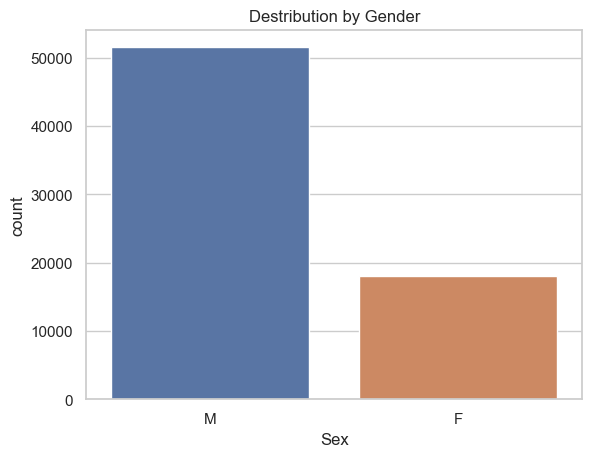

In [ ]:
sns.countplot(data = df, x = "Sex", hue="Sex")
plt.title("Destribution by Gender")
plt.show()

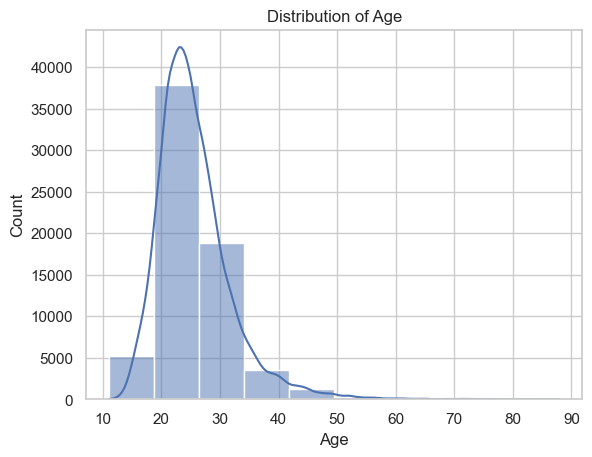

In [33]:
sns.histplot(data = df, x = "Age", kde = True, bins=10,legend = False)
plt.title("Distribution of Age")
plt.show()

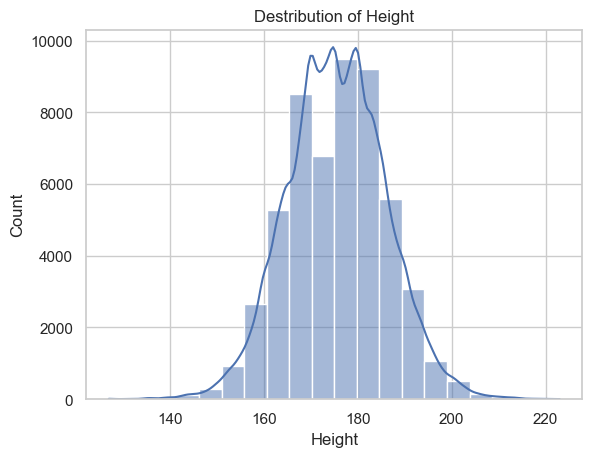

In [34]:
sns.histplot(data = df, x = "Height", bins = 20, kde = True)
plt.title("Destribution of Height")
plt.show()

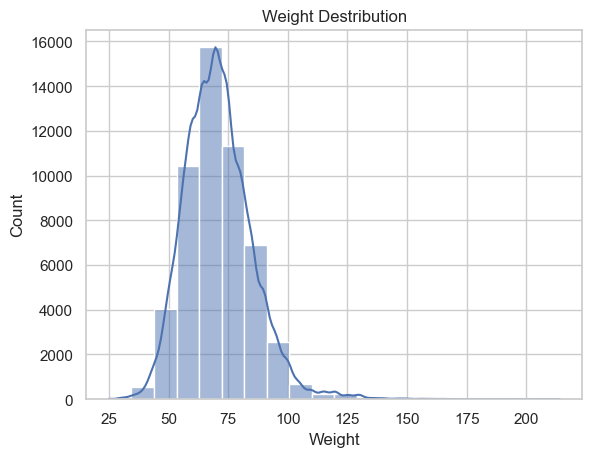

In [36]:
sns.histplot(df, x = "Weight", bins = 20, kde = True)
plt.title("Weight Destribution")
plt.show()

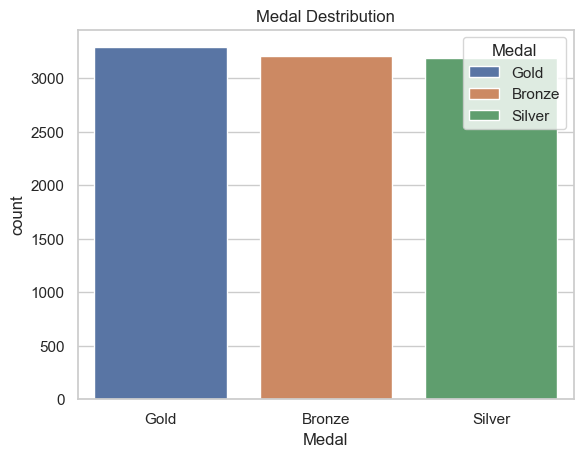

In [ ]:
sns.countplot(df, x = "Medal", hue = "Medal")
plt.title("Medal Destribution")
plt.show()

In [38]:
df.groupby("Year")["Age"].mean()

Year
1896    23.029412
1900    29.119883
1904    27.063241
1906    26.989474
1908    27.000000
1912    27.965552
1920    29.241135
1924    28.252267
1928    27.973564
1932    29.606987
1936    27.245665
1948    28.363170
1952    26.273684
1956    26.316156
1960    25.136156
1964    24.852107
1968    24.316722
1972    24.126448
1976    23.656820
1980    23.312364
1984    24.060328
1988    24.257374
1992    24.637827
1994    24.487516
1996    25.338210
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685148
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64

In [41]:
country_gender_count = df.groupby(["NOC", "Sex"])["ID"].count()
print(country_gender_count)

NOC  Sex
AFG  M       38
AHO  F        6
     M       27
ALB  F        4
     M        7
           ... 
YUG  M      455
ZAM  F        3
     M       40
ZIM  F       41
     M       47
Name: ID, Length: 432, dtype: int64


In [42]:
country_gold_medal = df[df["Medal"] == "Gold"].groupby("NOC")["Medal"].count()
print(country_gold_medal)

NOC
ALG      1
ANZ      7
ARG     25
ARM      1
AUS     98
      ... 
URU     13
USA    747
UZB      4
YUG     31
ZIM      7
Name: Medal, Length: 84, dtype: int64


In [44]:
sports_gender_avg_weight = df.groupby(["Sport", "Sex"])["Weight"].mean()
sports_gender_avg_weight

Sport          Sex
Alpine Skiing  F      62.154589
               M      77.725309
Alpinism       F            NaN
               M            NaN
Archery        F      61.023256
                        ...    
Water Polo     M      87.584973
Weightlifting  F      66.189474
               M      79.927852
Wrestling      F      58.169014
               M      77.256240
Name: Weight, Length: 114, dtype: float64

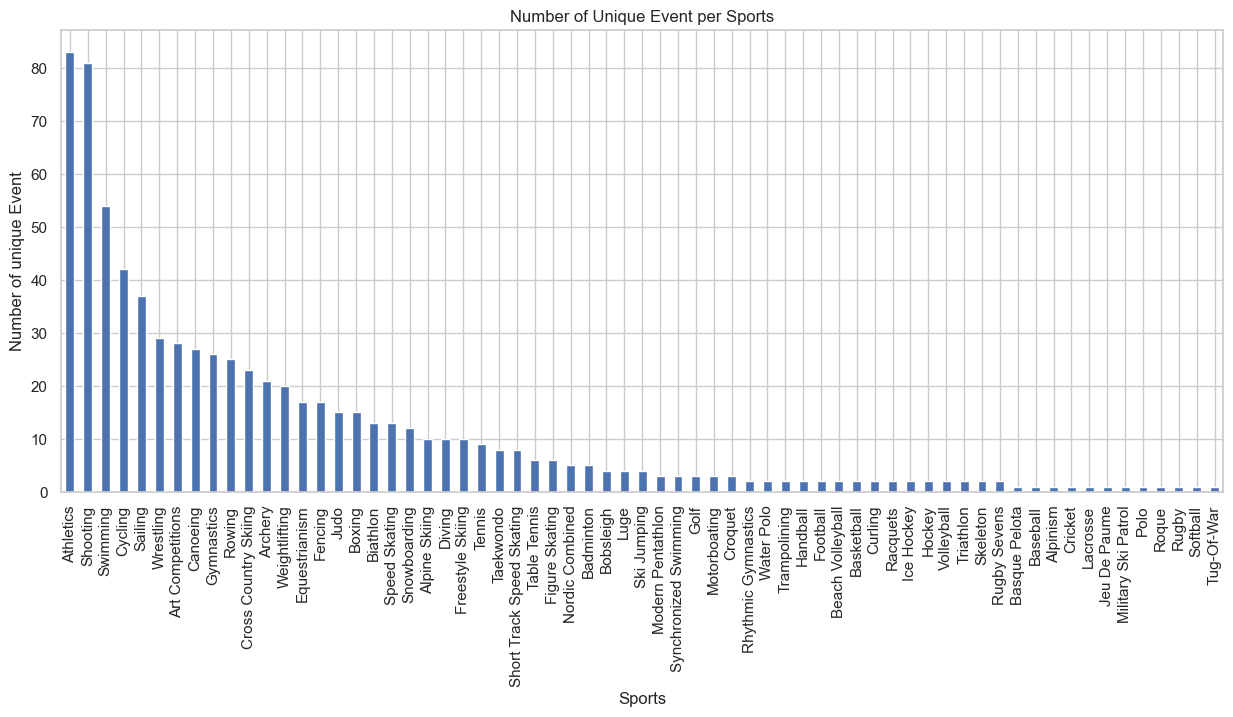

In [63]:
sports_event_count = df.groupby("Sport")["Event"].nunique().sort_values(ascending = False)
sports_event_count.plot(kind = "bar", figsize= (15, 6))
plt.title("Number of Unique Event per Sports")
plt.xlabel("Sports")
plt.ylabel("Number of unique Event")
plt.show()

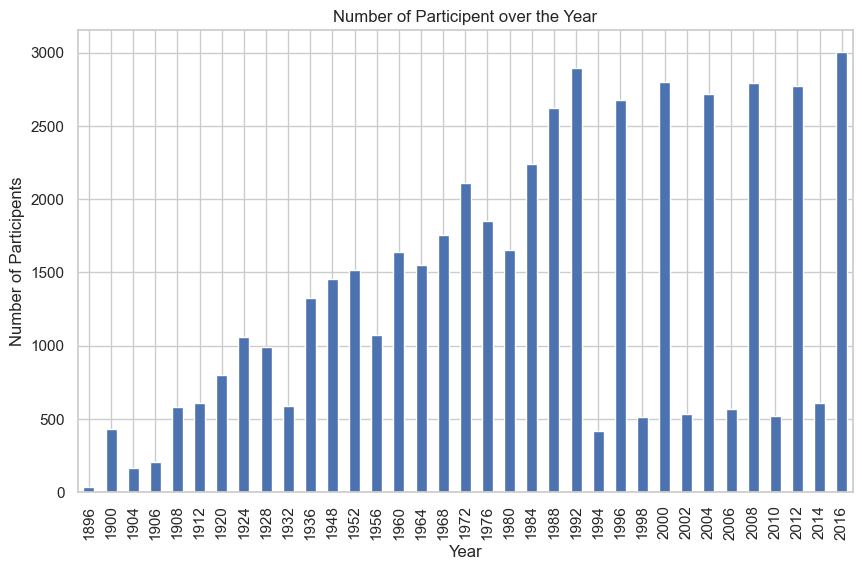

In [68]:
year_participent_count = df.groupby("Year")["ID"].nunique()
year_participent_count.plot(kind = "bar", figsize = (10, 6))
plt.title("Number of Participent over the Year")
plt.xlabel("Year")
plt.ylabel("Number of Participents")
plt.show()

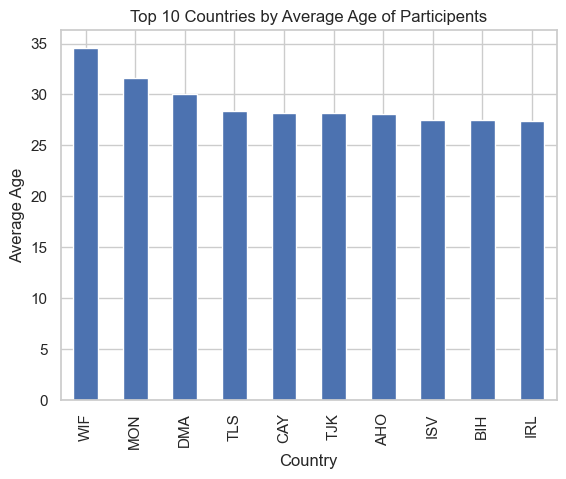

In [77]:
country_avg_age = df.groupby("NOC")["Age"].mean().sort_values(ascending = False)
country_avg_age.head(10).plot(kind = "bar")
plt.title("Top 10 Countries by Average Age of Participents")
plt.xlabel("Country")
plt.ylabel("Average Age")
plt.show()

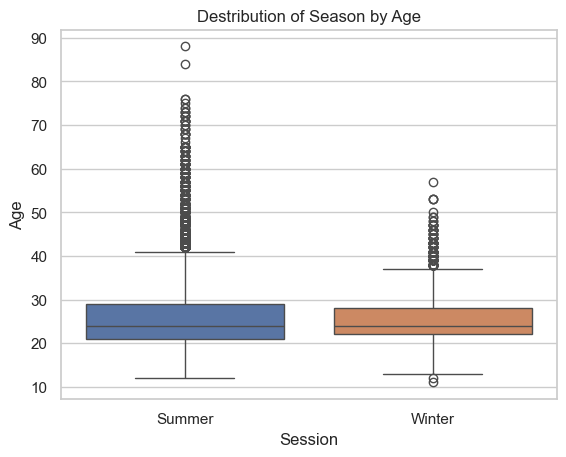

In [81]:
sns.boxplot(df, x = "Season", y = "Age", hue = "Season")
plt.title("Destribution of Season by Age")
plt.xlabel("Session")
plt.ylabel("Age")
plt.show()

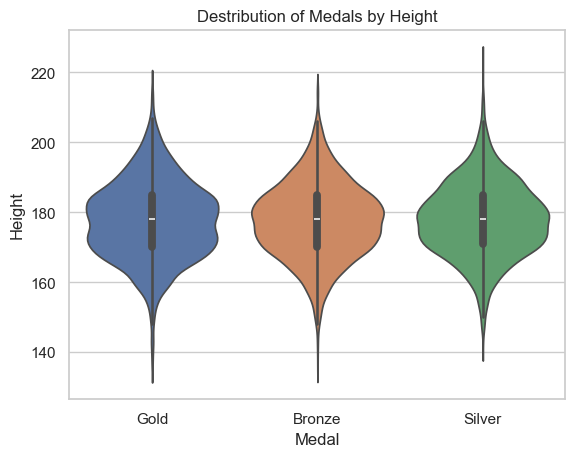

In [90]:
sns.violinplot(df, x = "Medal", y = "Height", hue = "Medal", legend = False)
plt.title("Destribution of Medals by Height")
plt.xlabel("Medal")
plt.ylabel("Height")
plt.show()

In [95]:
most_medal_country = df["NOC"].value_counts().idxmax()
print(f"Most Medal Winning Country: {most_medal_country}")

Most Medal Winning Country: USA


In [ ]:
talles_athlete = df[df["Height"] == df["Height"].max()]
print("Tallest Athlete")
print(talles_athlete[["ID", "Name", "Height", "Sport"]])

Tallest Athlete
          ID                  Name  Height       Sport
32376  16639  Tommy Loren Burleson   223.0  Basketball


In [100]:
heaviest_athlete = df[df["Weight"] == df["Weight"].max()]
print("Heaviest Athlete")
print(heaviest_athlete[["ID", "NOC", "Name", "Weight", "Sport"]])

Heaviest Athlete
          ID  NOC               Name  Weight Sport
23155  12177  GUM  Ricardo Blas, Jr.   214.0  Judo
23156  12177  GUM  Ricardo Blas, Jr.   214.0  Judo


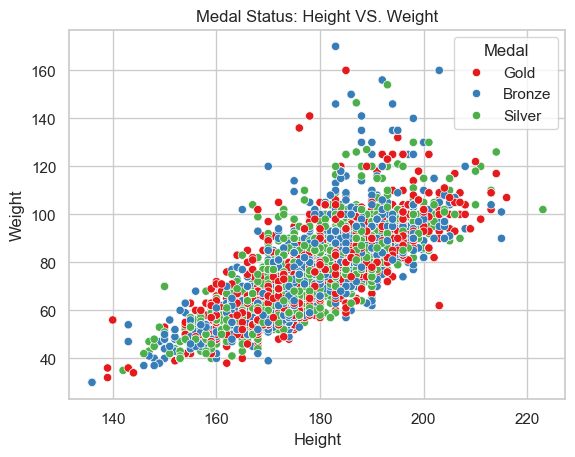

In [105]:
sns.scatterplot(df, x = "Height", y = "Weight", hue = "Medal", palette="Set1")
plt.title("Medal Status: Height VS. Weight")
plt.show()

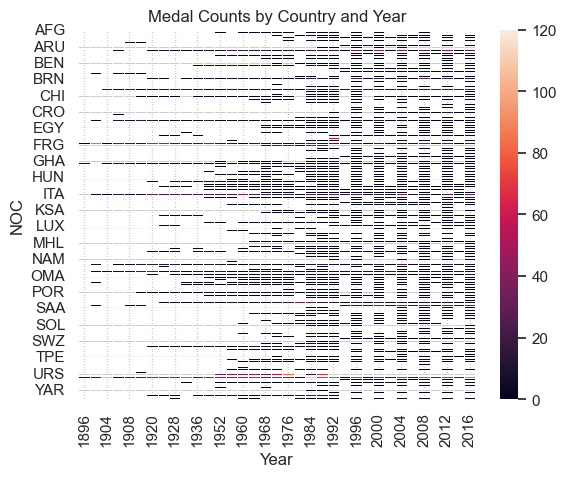

In [112]:
medals_by_country_year = df.pivot_table(index = "NOC", columns = "Year", values = "Medal", aggfunc = "count")
sns.heatmap(medals_by_country_year, linewidths = 0.5)
plt.title("Medal Counts by Country and Year")
plt.show()